<a href="https://colab.research.google.com/github/Sruthi0906/FMML_Project_and_Labs/blob/main/Module_04_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [ ]:
def f(x):
    return x ** 2 + x + 1

In [ ]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

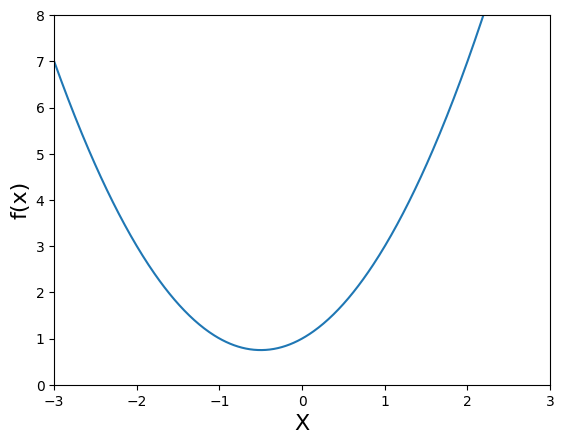

In [ ]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [ ]:
def df(x):
    return 2 * x + 1

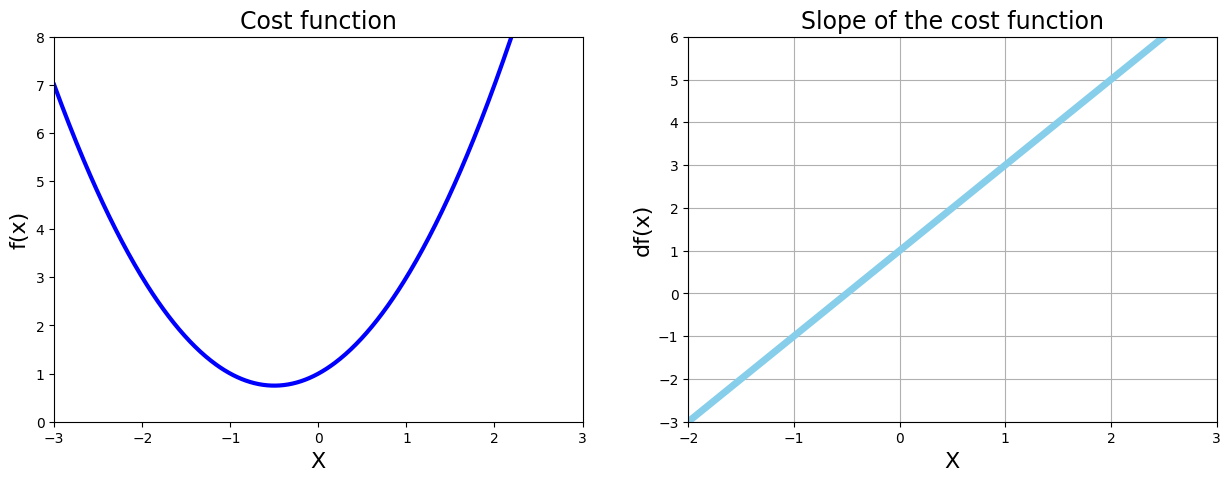

In [ ]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [ ]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)## [REQUIRED]
    new_x =previous_x-step_multiplier*gradient ## [REQUIRED]

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))## [REQUIRED]

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


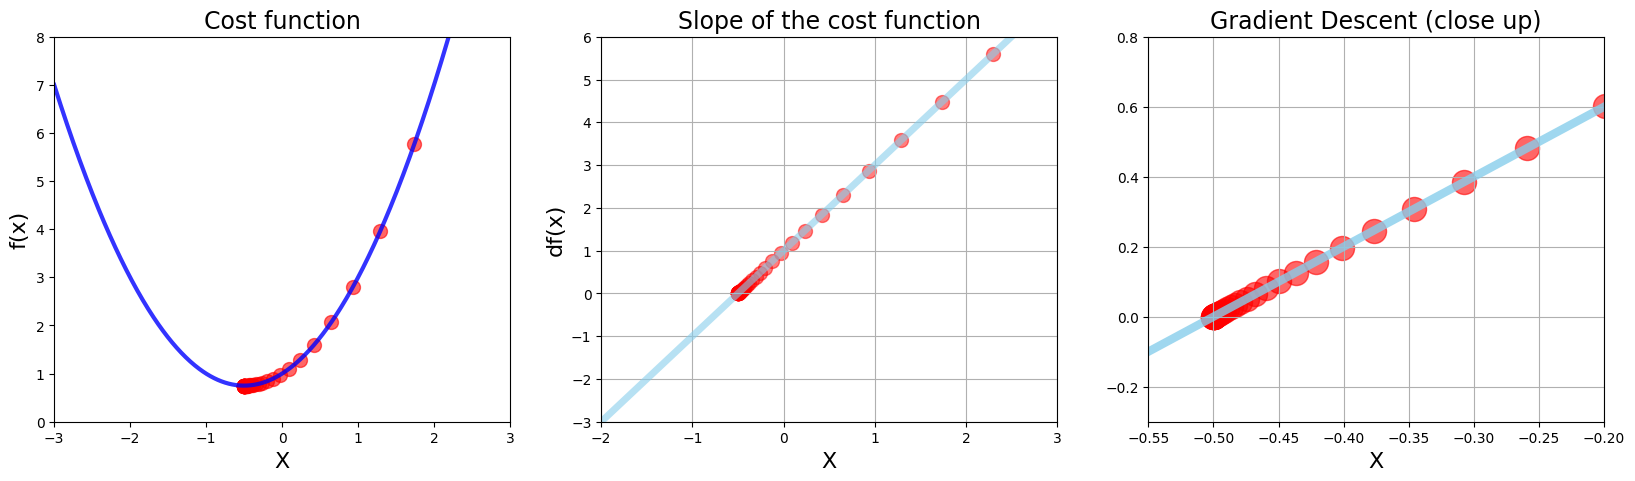

In [ ]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [ ]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4-4*x**2+5  ## [REQUIRED]

def dg(x):
    return 4*x**3-8*x  ## [REQUIRED]

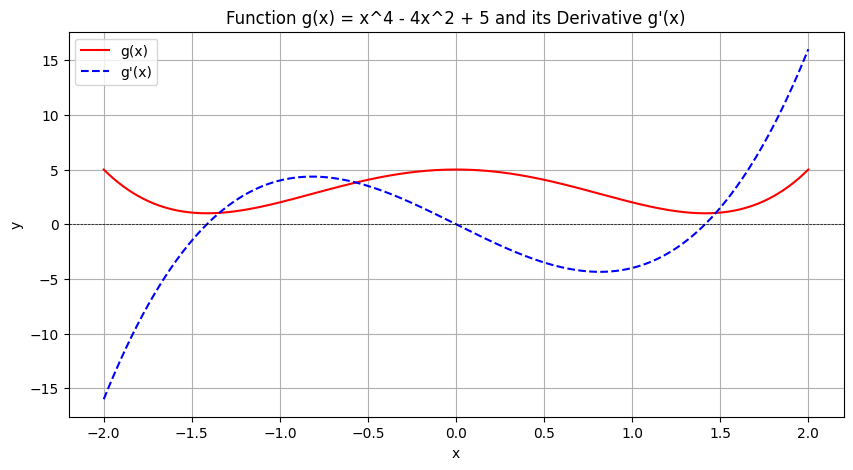

In [ ]:
## TASK-3 : Plot function and derivative side by side like has been done earlier
# Plot g(x) and dg(x)
plt.figure(figsize=(10, 5))

plt.plot(x_2, g(x_2), label='g(x)', color='red')

plt.plot(x_2, dg(x_2), label="g'(x)", color='blue', linestyle='--')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Function g(x) = x^4 - 4x^2 + 5 and its Derivative g\'(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


## Gradient Descent

In [ ]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [ ]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


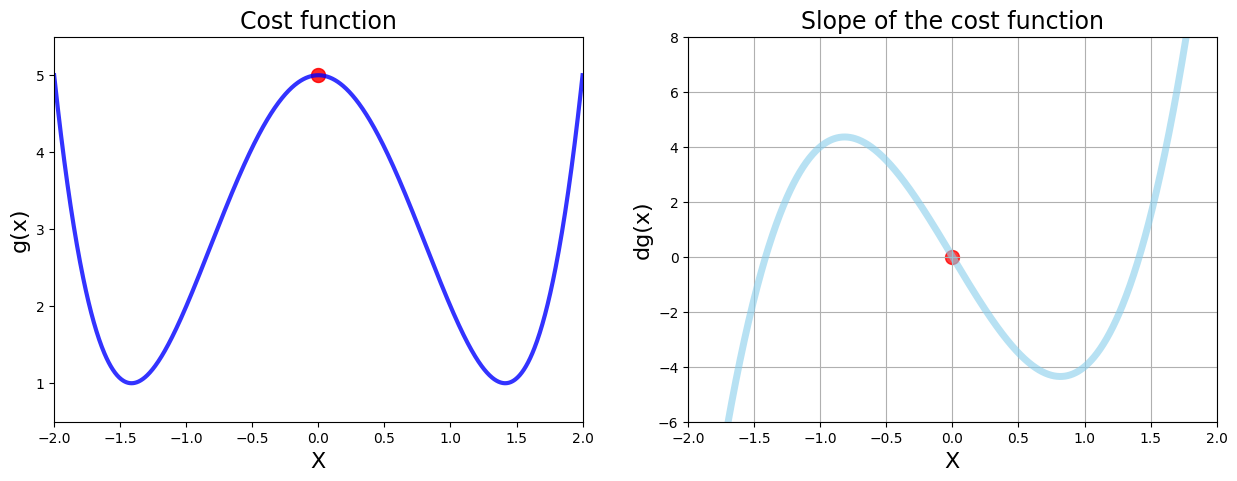

In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

In [ ]:
## TASK-4 : Code the same things as they were done for the first two examples

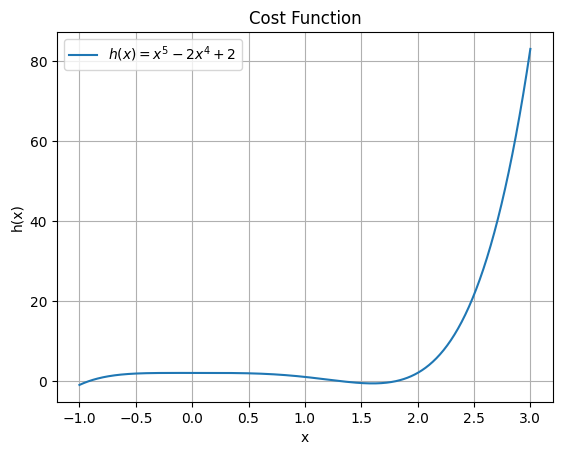

Update is too large. Gradient descent may be diverging.
Initial Guess: -1, Found Minimum: -550013.3774960886
Initial Guess: 0.5, Found Minimum: 1.4969954512300143
Initial Guess: 2.5, Found Minimum: 1.6000017191107885


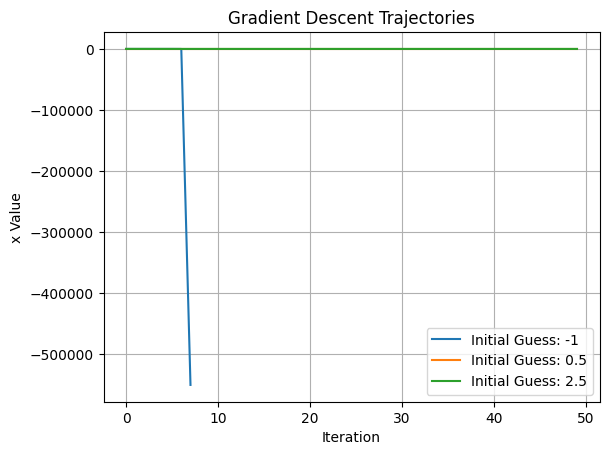

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def cost_function(x):
    return x**5 - 2*x**4 + 2
def cost_function_derivative(x):
    return 5*x**4 - 8*x**3
def gradient_descent(initial_guess, learning_rate, iterations):
    x = initial_guess
    trajectory = []
    for _ in range(iterations):
        trajectory.append(x)
        update = learning_rate * cost_function_derivative(x)
        if abs(update) > 1e10:
            print("Update is too large. Gradient descent may be diverging.")
            break
        x -= update
    return x, trajectory
x_range = np.linspace(-1, 3, 500)
y_values = cost_function(x_range)
plt.plot(x_range, y_values, label=r"$h(x) = x^5 - 2x^4 + 2$")
plt.title("Cost Function")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.grid()
plt.legend()
plt.show()
initial_guesses = [-1, 0.5, 2.5]
learning_rate = 0.01
iterations = 50
for guess in initial_guesses:
    x_min, trajectory = gradient_descent(guess, learning_rate, iterations)
    print(f"Initial Guess: {guess}, Found Minimum: {x_min}")
    plt.plot(range(len(trajectory)), trajectory, label=f"Initial Guess: {guess}")
plt.title("Gradient Descent Trajectories")
plt.xlabel("Iteration")
plt.ylabel("x Value")
plt.legend()
plt.grid()
plt.show()

#### Learning Rate

In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

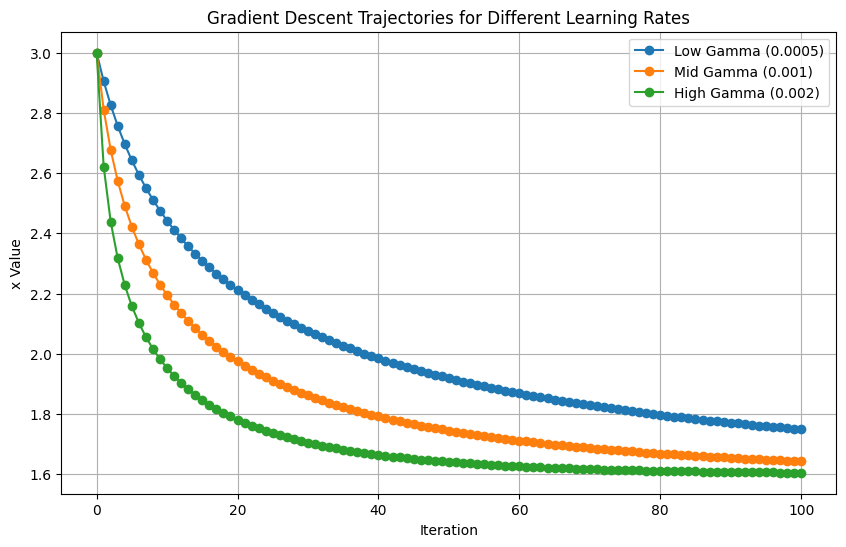

Low Gamma: Minimum at x = 1.7487898287083863
Mid Gamma: Minimum at x = 1.6432266873712833
High Gamma: Minimum at x = 1.6046689008437607


In [ ]:
#TASK 5:
#TASK 6:
import numpy as np
import matplotlib.pyplot as plt
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    trajectory = [x]
    for _ in range(max_iter):
        grad = derivative_func(x)
        x_new = x - multiplier * grad
        trajectory.append(x_new)


        if abs(x_new - x) < precision:
            break

        if abs(x_new) > 1e10:  # Adjust the threshold if needed
            print("Update is too large. Gradient descent may be diverging.")
            break

        x = x_new
    return x, trajectory
def dg(x):
    return 5 * x**4 - 8 * x**3
n = 100
precision = 0.0001
low_gamma_result, low_trajectory = gradient_descent(dg, initial_guess=3, multiplier=0.0005, precision=precision, max_iter=n)
mid_gamma_result, mid_trajectory = gradient_descent(dg, initial_guess=3, multiplier=0.001, precision=precision, max_iter=n)
high_gamma_result, high_trajectory = gradient_descent(dg, initial_guess=3, multiplier=0.002, precision=precision, max_iter=n)
plt.figure(figsize=(10, 6))
plt.plot(low_trajectory, label=f"Low Gamma (0.0005)", marker='o')
plt.plot(mid_trajectory, label=f"Mid Gamma (0.001)", marker='o')
plt.plot(high_trajectory, label=f"High Gamma (0.002)", marker='o')
plt.title("Gradient Descent Trajectories for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("x Value")
plt.legend()
plt.grid()
plt.show()
print(f"Low Gamma: Minimum at x = {low_gamma_result}")
print(f"Mid Gamma: Minimum at x = {mid_gamma_result}")
print(f"High Gamma: Minimum at x = {high_gamma_result}")

n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)


mid_gamma =  gradient_descent(dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)## [REQUIRED]
high_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)
   ## [REQUIRED]

# Experiment
# Reduced

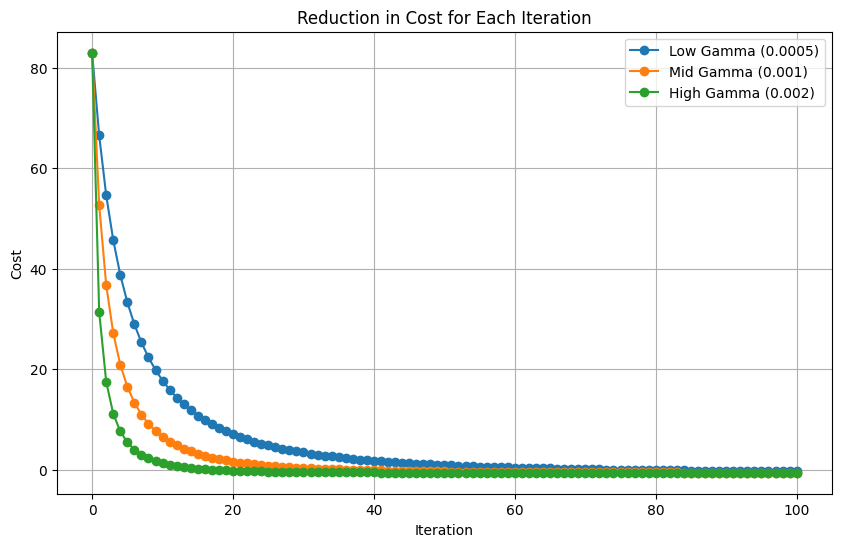

In [ ]:
## TASK-7 : Plot reduction in cost for each iteration

def cost_function(x):
    return x**5 - 2*x**4 + 2
low_costs = [cost_function(x) for x in low_trajectory]
mid_costs = [cost_function(x) for x in mid_trajectory]
high_costs = [cost_function(x) for x in high_trajectory]
plt.figure(figsize=(10, 6))
plt.plot(low_costs, label="Low Gamma (0.0005)", marker='o')
plt.plot(mid_costs, label="Mid Gamma (0.001)", marker='o')
plt.plot(high_costs, label="High Gamma (0.002)", marker='o')
plt.title("Reduction in Cost for Each Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()


### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [ ]:
## TASK-8 : Code the same things as they were done for the first two examples

In [ ]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

In [ ]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [2]:
# $\frac{\partial f}{\partial x} = (2x * 3^(-x^2 - y^2) * ln(3)) / (3^(-x^2 - y^2) + 1)^2$

# $\frac{\partial f}{\partial y} = (2y * 3^(-x^2 - y^2) * ln(3)) / (3^(-x^2 - y^2) + 1)^2$

In [5]:
from sympy import symbols, diff
a, b = symbols('x, y')

# Define the function f(x, y) for symbolic computation
def f(x, y):
    return 1 / (3**(-x**2 - y**2) + 1)

print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [6]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return 2 * x  ## [REQUIRED]

def fpy(x, y):
    return 2 * y ## [REQUIRED]

In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

def f(x,y):
  return x**2+y**2
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979e-48 8.76866553e-49]
Minimum occurs at x value of:  6.313439179878134e-49
Minimum occurs at y value of:  3.507466211043411e-49
The cost is:  5.216183349963152e-97




```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [10]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

def f(x,y):
  return x**2+y**2

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [1.86728201e-19 1.03737889e-19]
Minimum occurs at x value of:  7.469128023985783e-20
Minimum occurs at y value of:  4.149515568880998e-20
The cost is:  7.300635289507557e-39


(1, 2)


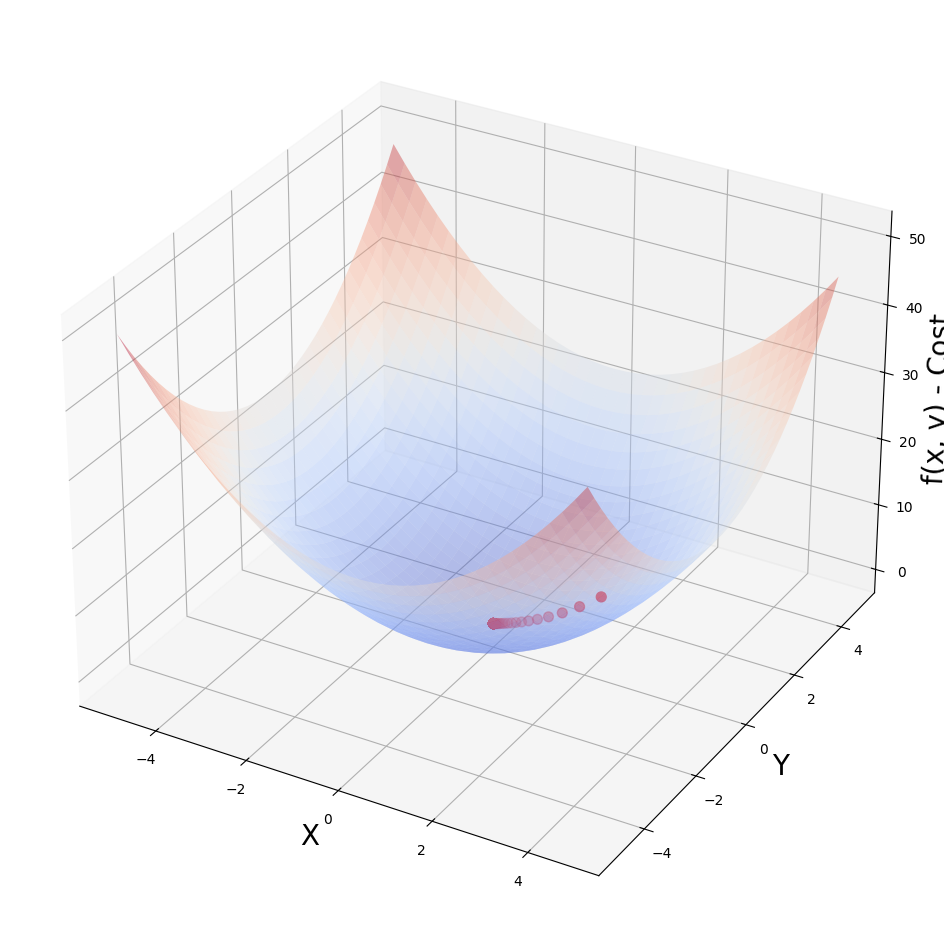

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
# Instead of fig.gca(projection='3d'), use fig.add_subplot with the 3D projection:
ax = fig.add_subplot(111, projection='3d') # Changed line

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Assuming x_4, y_4, and f are defined elsewhere in your code
# If not, replace with appropriate data or functions
x_4 = np.arange(-5, 5, 0.25)  # Example data for x_4
y_4 = np.arange(-5, 5, 0.25)  # Example data for y_4
x_4, y_4 = np.meshgrid(x_4, y_4)
def f(x, y):  # Example function for f
    return x**2 + y**2
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

# Define or initialize values_array before using it
# ---- This was moved up from the plotting code block
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)


def f(x,y):
  return x**2+y**2

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
# ----

ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [11]:
# Make sample data
import numpy as np
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [12]:
# Quick linear regressino
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


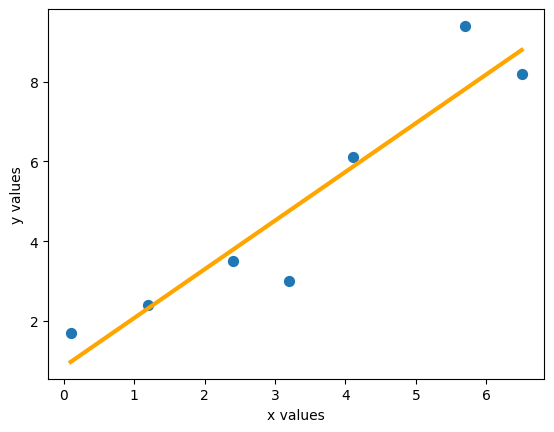

In [13]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [ ]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [14]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [ ]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [ 0.94796558]
MSE regression using manual calc is 0.947965575979
MSE regression is 0.947965575979


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [ ]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


#### Calc MSE using nested for loops

In [ ]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


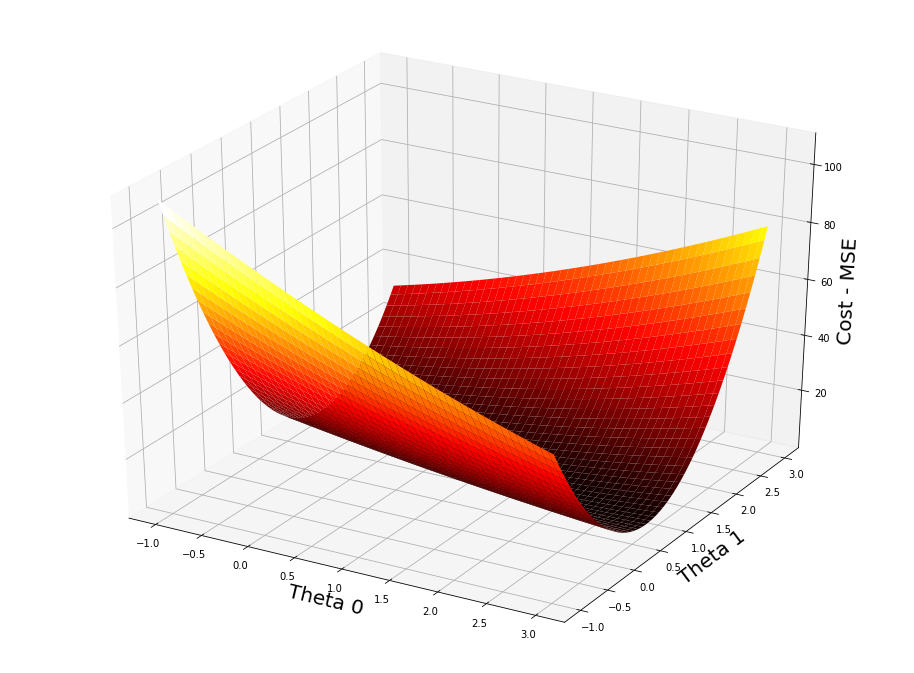

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [ ]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.948382652675
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643
Min MSE for Theta 1 at plot_t1[111][91] 1.23115577889


#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [15]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [16]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


In [17]:
# Import the necessary modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# Define the MSE function
def mse(y_true, y_pred):
    """Calculates the Mean Squared Error (MSE).

    Args:
        y_true: The actual target values.
        y_pred: The predicted target values.

    Returns:
        The MSE value.
    """
    n = len(y_true)
    return np.sum((y_true - y_pred)**2) / n

# Assuming x_5, y_5, and grad functions are defined in previous cells
# Define these or import them if needed

# Define the range of theta values for the surface plot
theta0_vals = np.linspace(-2, 4, 100)
theta1_vals = np.linspace(-2, 4, 100)
plot_t0, plot_t1 = np.meshgrid(theta0_vals, theta1_vals)

# Calculate MSE values for the surface plot
plot_cost = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        plot_cost[i, j] = mse(y_5, plot_t0[i, j] + plot_t1[i, j] * x_5)

# Initialize theta values and collect data points for scatter plot
multiplier = 0.01
thetas = np.array([2.9, 2.9])
plot_vals = thetas.reshape(1, 2)  # Initialize plot_vals
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

# Gradient descent iterations
for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

In [20]:
# Import the necessary modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# Define the MSE function
def mse(y_true, y_pred):
    """Calculates the Mean Squared Error (MSE).

    Args:
        y_true: The true values.
        y_pred: The predicted values.
    """
    # Your MSE calculation code here
    n = len(y_true)
    return np.sum((y_true - y_pred)**2) / n # Corrected indentation and added MSE calculation

In [23]:
# Import the necessary modules
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# Define the MSE function
def mse(y_true, y_pred):
    """Calculates the Mean Squared Error (MSE).

    Args:
        y_true: The actual target values.
        y_pred: The predicted target values.

    Returns:
        The MSE value.
    """
    n = len(y_true)
    return np.sum((y_true - y_pred)**2) / n

# Assuming x_5, y_5, and grad functions are defined in previous cells
# Define these or import them if needed

# Generating some example data for x_5 and y_5
# Replace this with your actual data if available
x_5 = np.linspace(0, 10, 50)  # Example x values
y_5 = 2 * x_5 + 3 + np.random.randn(50)  # Example y values with some noise



# Define the range of theta values for the surface plot
theta0_vals = np.linspace(-2, 4, 100)
theta1_vals = np.linspace(-2, 4, 100)
plot_t0, plot_t1 = np.meshgrid(theta0_vals, theta1_vals)

# Calculate MSE values for the surface plot
plot_cost = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        plot_cost[i, j] = mse(y_5, plot_t0[i, j] + plot_t1[i, j] * x_5)

# Initialize theta values and collect data points for scatter plot
multiplier = 0.01
thetas = np.array([2.9, 2.9])
plot_vals = thetas.reshape(1, 2)  # Initialize plot_vals
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

# Gradient descent iterations
for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

In [24]:
def grad(x, y, thetas):
    n = y.size

    # Calculate theta0_slope and theta1_slope
    theta0_slope = (-2/n) * np.sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * np.sum((y - thetas[0] - thetas[1]*x)*x)

    # Convert theta0_slope and theta1_slope to 1-dimensional arrays
    # before concatenating
    return np.array([theta0_slope, theta1_slope])